###librerie

In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from itertools import product

#bitcoin?

###funzioni

In [2]:
def rend(r, p):
  return (r.mean() @ p)*252

In [3]:
def dev(r, p):
  cov = r.cov()*252
  return np.sqrt(np.array(p).T @ cov @ p)

###input

In [4]:
tickers = ['SWDA.MI','EMG.MI','BTC-EUR']
nomi=['Azioni','Obbligazioni','Bitcoin']
#tickers = ['VTI','BND','BTC-USD']
prezzi = yf.download(tickers)['Adj Close']
prezzi = prezzi.reindex(tickers,axis=1)

[*********************100%%**********************]  3 of 3 completed


In [5]:
rendimenti = prezzi.pct_change(1).dropna()

In [6]:
log_return = np.log(prezzi/prezzi.shift(1)).dropna()

<Axes: xlabel='Date'>

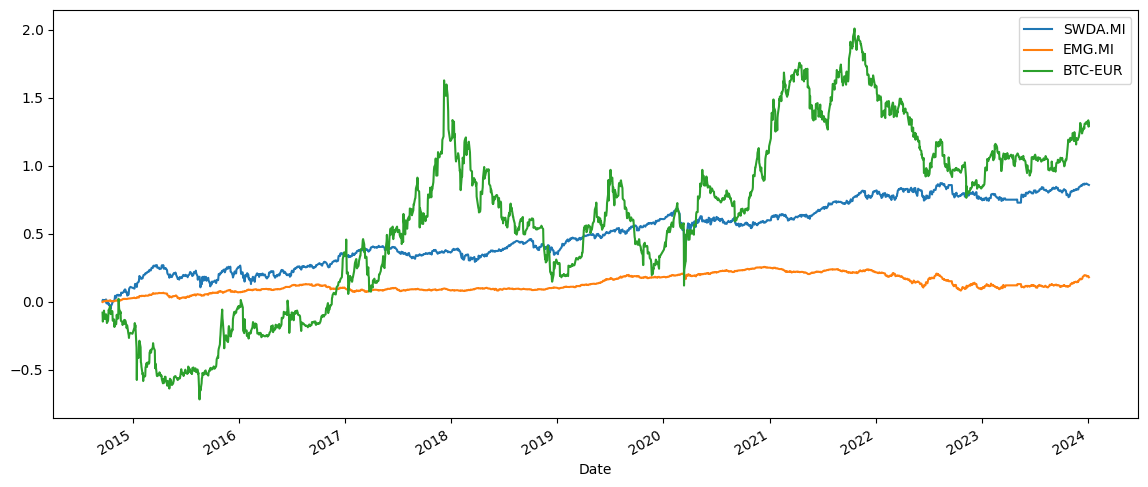

In [7]:
log_return.cumsum().plot(figsize=(14,6))

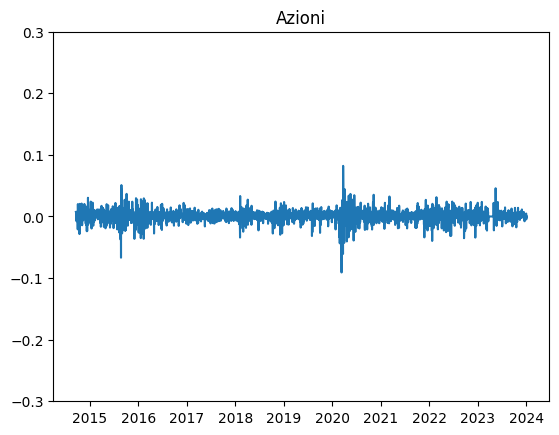

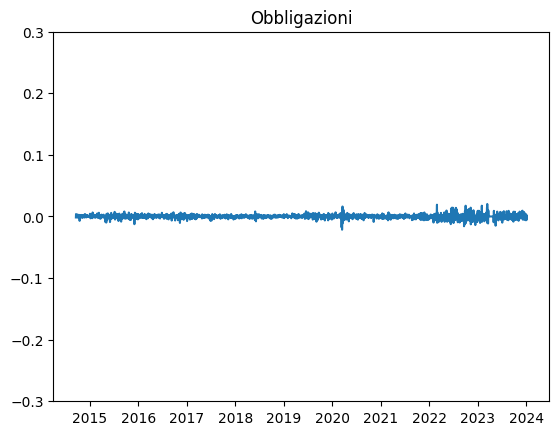

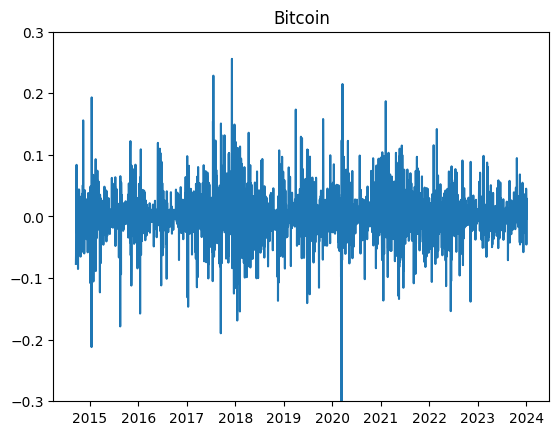

In [9]:
ren = prezzi.pct_change(1).dropna()
for i in range(len(tickers)):
  plt.plot(ren.iloc[:,i])
  plt.title(nomi[i])
  plt.ylim(-.3,.3)
  plt.show()

###simulazione storica (ultimi 10 anni)

In [10]:
percentuali = [(a/100, b/100, c/100) for a, b, c in product(range(101), repeat=3) if a + b + c == 100]

In [11]:
output=pd.DataFrame(columns=['% azioni','% obbligazioni','% bitcoin','Rendimento','Deviazione standard','Risk/Return'],index=range(len(percentuali)))
c=0
for p in percentuali:
  output.iloc[c,0]=p[0]
  output.iloc[c,1]=p[1]
  output.iloc[c,2]=p[2]
  output.iloc[c,3]=rend(log_return,p)
  output.iloc[c,4]=dev(log_return,p)
  output.iloc[c,5]=output.iloc[c,3]/output.iloc[c,4]
  c+=1

In [12]:
output

,% azioni,% obbligazioni,% bitcoin,Rendimento,Deviazione standard,Risk/Return
0,0.0,0.0,1.0,0.177389,0.645618,0.274759
1,0.0,0.01,0.99,0.175858,0.639197,0.275124
2,0.0,0.02,0.98,0.174327,0.632777,0.275496
3,0.0,0.03,0.97,0.172797,0.626357,0.275876
4,0.0,0.04,0.96,0.171266,0.619937,0.276263
...,...,...,...,...,...,...
5146,0.98,0.01,0.01,0.115441,0.16116,0.716311
5147,0.98,0.02,0.0,0.11391,0.16005,0.711716
5148,0.99,0.0,0.01,0.116355,0.162761,0.714882
5149,0.99,0.01,0.0,0.114824,0.161652,0.710319


In [13]:
output.sort_values(by=['Risk/Return','Rendimento'],ascending=False)

,% azioni,% obbligazioni,% bitcoin,Rendimento,Deviazione standard,Risk/Return
2937,0.34,0.64,0.02,0.05845,0.069998,0.835025
3003,0.35,0.63,0.02,0.059364,0.071103,0.834906
2870,0.33,0.65,0.02,0.057535,0.068916,0.834859
3068,0.36,0.62,0.02,0.060278,0.072231,0.834529
2802,0.32,0.66,0.02,0.056621,0.06786,0.834382
...,...,...,...,...,...,...
4,0.0,0.04,0.96,0.171266,0.619937,0.276263
3,0.0,0.03,0.97,0.172797,0.626357,0.275876
2,0.0,0.02,0.98,0.174327,0.632777,0.275496
1,0.0,0.01,0.99,0.175858,0.639197,0.275124


In [14]:
print('Portafoglio che massimizza risk/return')
output.sort_values(by=['Risk/Return','Rendimento'],ascending=False).iloc[0,:]

Portafoglio che massimizza risk/return


% azioni                   0.34
% obbligazioni             0.64
% bitcoin                  0.02
Rendimento              0.05845
Deviazione standard    0.069998
Risk/Return            0.835025
Name: 2937, dtype: object

In [15]:
print('Portafoglio che minimizza deviazione standard')
output.sort_values(by=['Deviazione standard'],ascending=True).iloc[0,:]

Portafoglio che minimizza deviazione standard


% azioni                   0.08
% obbligazioni             0.92
% bitcoin                   0.0
Rendimento             0.031613
Deviazione standard    0.051548
Risk/Return            0.613283
Name: 872, dtype: object

In [16]:
print('Portafoglio che massimizza risk/return per volatilità annuale 10%')
output.loc[(output['Deviazione standard']>=.1) & (output['Deviazione standard']<.11)].sort_values(by=['Risk/Return','Rendimento'],ascending=False).iloc[0,:]

Portafoglio che massimizza risk/return per volatilità annuale 10%


% azioni                   0.56
% obbligazioni             0.41
% bitcoin                  0.03
Rendimento             0.080097
Deviazione standard    0.100172
Risk/Return            0.799603
Name: 4157, dtype: object

In [17]:
print('Portafoglio che massimizza risk/return con 0% bitcoin')
output.loc[(output['% bitcoin']==0)].sort_values(by=['Risk/Return','Rendimento'],ascending=False).iloc[0,:]

Portafoglio che massimizza risk/return con 0% bitcoin


% azioni                   0.35
% obbligazioni             0.65
% bitcoin                   0.0
Rendimento             0.056302
Deviazione standard    0.068407
Risk/Return            0.823048
Name: 3005, dtype: object

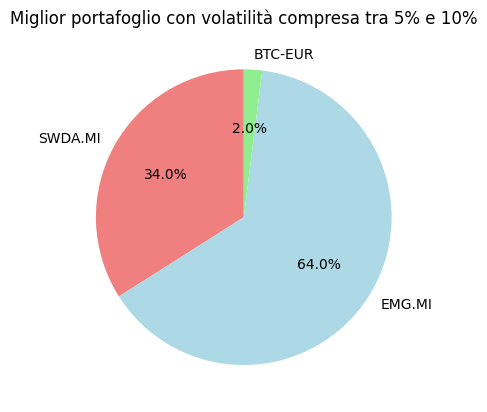

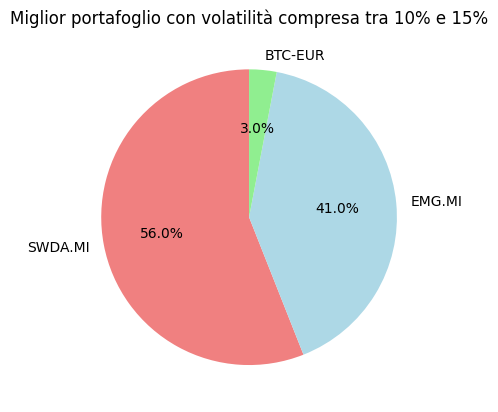

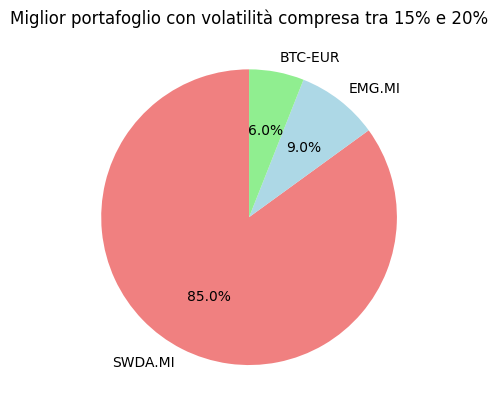

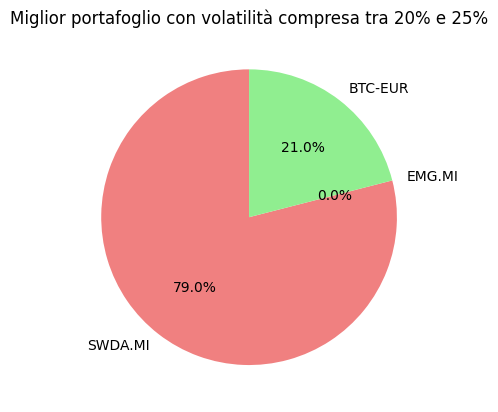

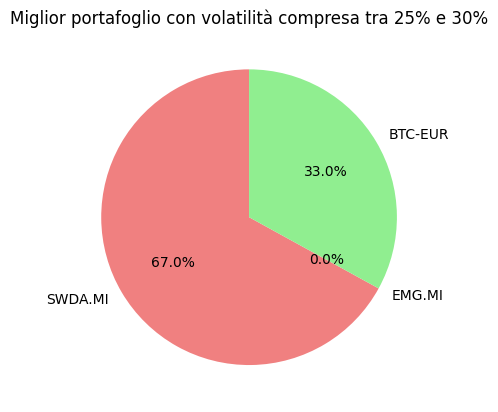

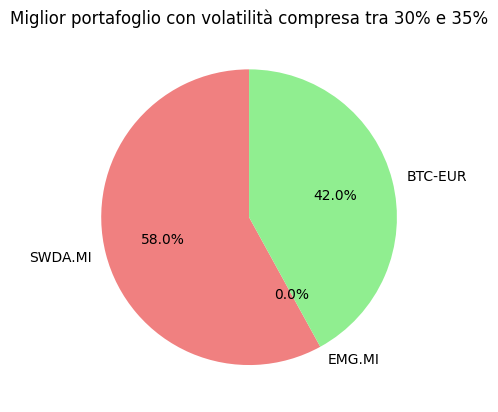

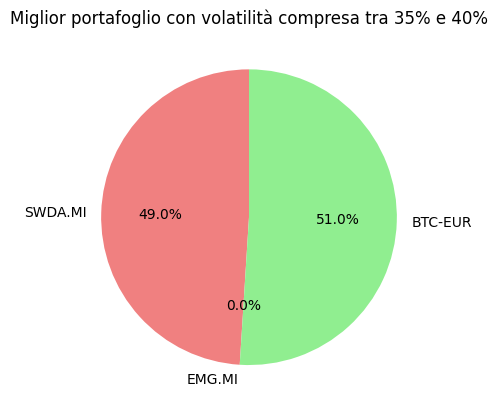

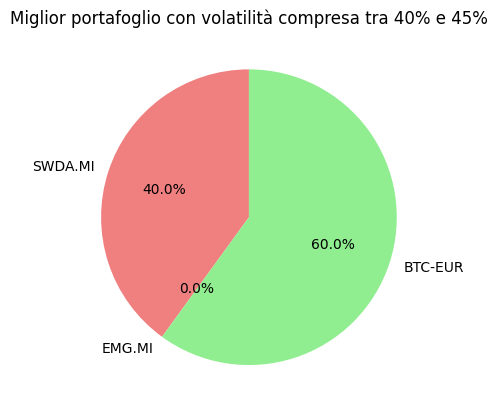

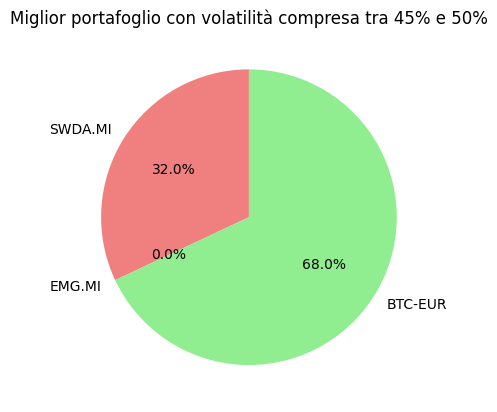

In [18]:
i_pre=5
for i in range(10,51,5):
  x = output.loc[(output['Deviazione standard']>=i_pre/100) & (output['Deviazione standard']<i/100)].sort_values(by=['Risk/Return','Rendimento'],ascending=False).iloc[0,:]
  y = [x[0],x[1],x[2]]
  colors = ['lightcoral', 'lightblue', 'lightgreen']
  plt.pie(y, labels=tickers, colors=colors, autopct='%1.1f%%', startangle=90)
  plt.title(f'Miglior portafoglio con volatilità compresa tra {i_pre}% e {i}%')
  i_pre=i
  plt.show()

In [19]:
rrmax = output.sort_values(by=['Risk/Return','Rendimento'],ascending=False).iloc[0,:]
rrmin = output.sort_values(by=['Deviazione standard'],ascending=True).iloc[0,:]
rrmax10 = output.loc[(output['Deviazione standard']>=.1)].sort_values(by=['Risk/Return','Rendimento'],ascending=False).iloc[0,:]
rrmaxnobc = output.loc[(output['% bitcoin']==0)].sort_values(by=['Risk/Return','Rendimento'],ascending=False).iloc[0,:]

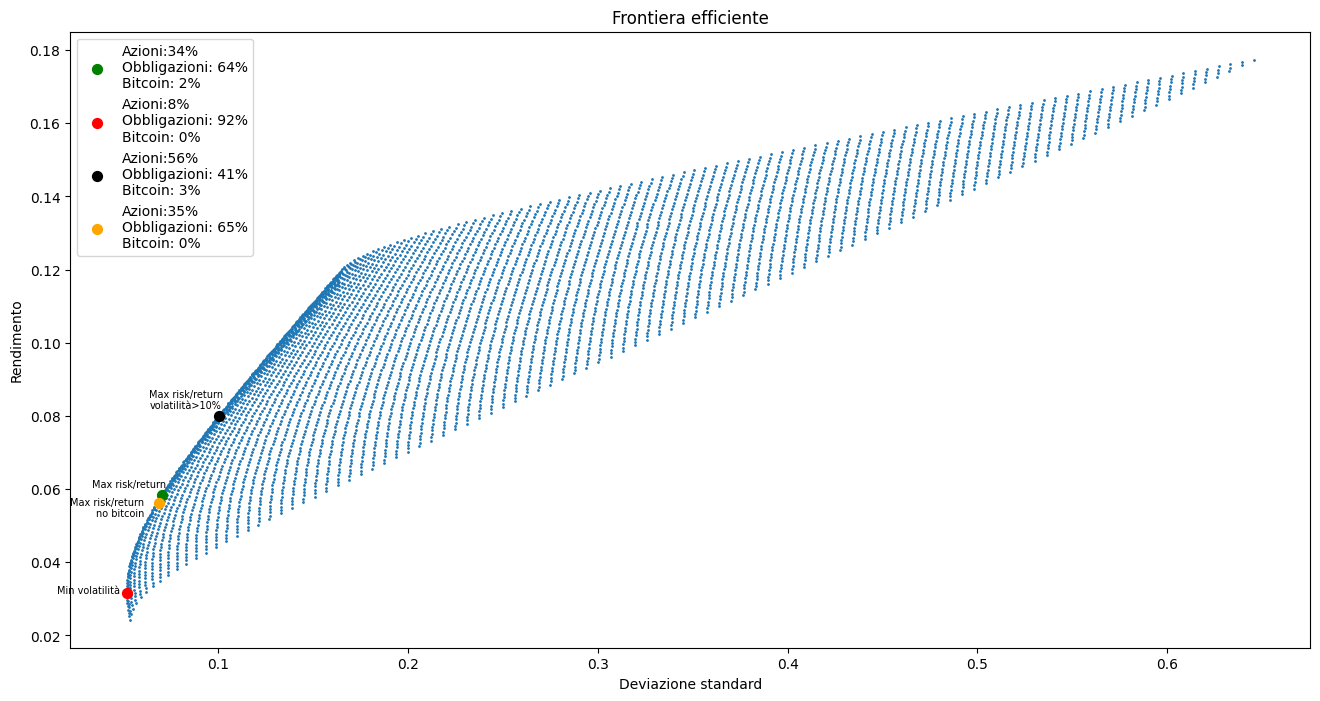

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(output.iloc[:,4],output.iloc[:,3],s=1)
plt.scatter(rrmax[4],rrmax[3],s=50,color='green', label=f'Azioni:{round(rrmax[0]*100)}%\nObbligazioni: {round(rrmax[1]*100)}%\nBitcoin: {round(rrmax[2]*100)}%')
plt.annotate('Max risk/return', (rrmax[4], rrmax[3]), textcoords="offset points", xytext=(-50,5), ha='left', fontsize=7)
plt.scatter(rrmin[4],rrmin[3],s=50,color='red', label=f'Azioni:{round(rrmin[0]*100)}%\nObbligazioni: {round(rrmin[1]*100)}%\nBitcoin: {round(rrmin[2]*100)}%')
plt.annotate('Min volatilità', (rrmin[4], rrmin[3]), textcoords="offset points", xytext=(-50,0), ha='left', fontsize=7)
plt.scatter(rrmax10[4],rrmax10[3],s=50,color='black', label=f'Azioni:{round(rrmax10[0]*100)}%\nObbligazioni: {round(rrmax10[1]*100)}%\nBitcoin: {round(rrmax10[2]*100)}%')
plt.annotate('Max risk/return\nvolatilità>10%', (rrmax10[4], rrmax10[3]), textcoords="offset points", xytext=(-50,5), ha='left', fontsize=7)
plt.scatter(rrmaxnobc[4],rrmaxnobc[3],s=50,color='orange', label=f'Azioni:{round(rrmaxnobc[0]*100)}%\nObbligazioni: {round(rrmaxnobc[1]*100)}%\nBitcoin: {round(rrmaxnobc[2]*100)}%')
plt.annotate('Max risk/return\nno bitcoin', (rrmaxnobc[4], rrmaxnobc[3]), textcoords="offset points", xytext=(-10,-10), ha='right', fontsize=7)
plt.xlabel(output.columns[4])
plt.ylabel(output.columns[3])
plt.legend()
plt.title('Frontiera efficiente')
plt.show()